#Task 3: Customer Segmentation / Clustering

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import davies_bouldin_score, silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load datasets
customers = pd.read_csv("Customers.csv")
transactions = pd.read_csv("Transactions.csv")

##Merge Datasets:

Combine Customers.csv and Transactions.csv to create a dataset with customer-level features.

In [ ]:
customer_transactions = transactions.merge(customers, on='CustomerID')

##Feature Engineering and Normalizing Features

In [ ]:
# Feature engineering
customer_features = customer_transactions.groupby('CustomerID').agg({
    'TotalValue': 'sum',              # Total transaction value
    'Quantity': 'sum',                # Total quantity purchased
    'ProductID': 'nunique',           # Number of unique products
    'Region': 'first'                 # Region
}).reset_index()

# Encode Region
customer_features['Region'] = customer_features['Region'].astype('category').cat.codes

# Normalize features
scaler = StandardScaler()
normalized_features = scaler.fit_transform(customer_features.drop('CustomerID', axis=1))

##Choose Clustering Algorithm:

Use KMeans and
explore cluster numbers between 2 and 10.

In [ ]:
# Find the optimal number of clusters using the Elbow method
sse = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(normalized_features)
    sse.append(kmeans.inertia_)

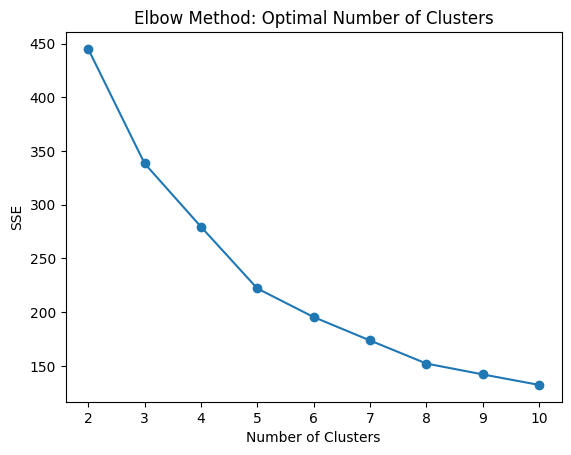

In [ ]:
# Plot SSE for Elbow method
plt.plot(range(2, 11), sse, marker='o')
plt.title('Elbow Method: Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.show()

In [ ]:
# Perform clustering with optimal clusters (4 clusters)
optimal_clusters = 4
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
customer_features['Cluster'] = kmeans.fit_predict(normalized_features)

##Evaluate Clustering:

Calculate clustering metrics such as:
Davies-Bouldin Index (DB Index): Lower values indicate better clustering.
Silhouette Score (optional): Measures how similar an object is to its own cluster.

In [ ]:
# Evaluate clustering using DB Index
db_index = davies_bouldin_score(normalized_features, customer_features['Cluster'])
print("Davies-Bouldin Index:", db_index)

Davies-Bouldin Index: 1.193774683695561


In [ ]:
# Optional: Silhouette Score
silhouette_avg = silhouette_score(normalized_features, customer_features['Cluster'])
print("Silhouette Score:", silhouette_avg)


Silhouette Score: 0.3169758859445276


##Visualizing Clusters

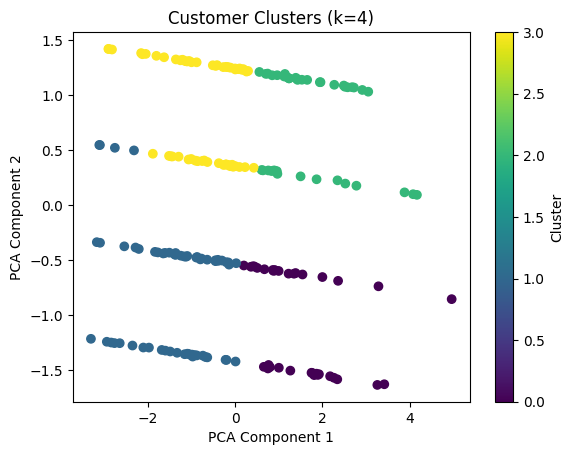

In [ ]:
# Visualize clusters using PCA
pca = PCA(n_components=2)
pca_features = pca.fit_transform(normalized_features)

plt.scatter(pca_features[:, 0], pca_features[:, 1], c=customer_features['Cluster'], cmap='viridis')
plt.title(f"Customer Clusters (k={optimal_clusters})")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label='Cluster')
plt.show()